In [274]:
using JLD

INFO: Recompiling stale cache file /Users/rawlik/.julia/lib/v0.6/JLD.ji for module JLD.


In [1]:
include("AxionMC.jl")
include("AxionPlotting.jl")

exclusionreportplot (generic function with 1 method)

In [56]:
brighten(color, v) = matplotlib[:colors][:to_rgb](color) .^ (1 - v)

brighten (generic function with 1 method)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] zero_arg_matrix_constructor(::String) at ./deprecated.jl:1265
 [3] Type at ./deprecated.jl:1268 [inlined]
 [4] (::Core.#kw#Type)(::Array{Any,1}, ::Type{AxionSim}) at ./<missing>:0
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] include_string(::Module, ::String, ::String) at /Users/rawlik/.julia/v0.6/Compat/src/Compat.jl:407
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/rawlik/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /Users/rawlik/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[287], in expression starting on line 4


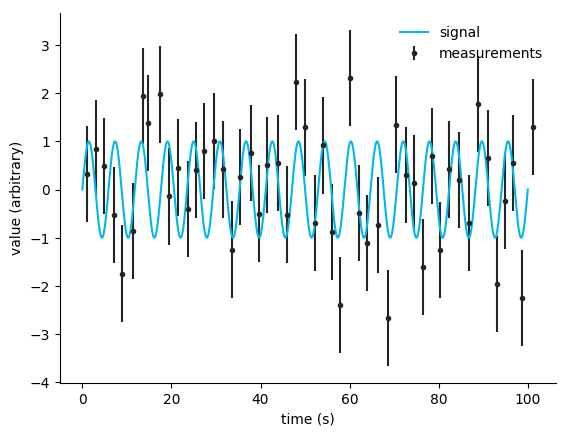

In [287]:
# seed the random number generator
srand(1)

as = AxionSim(
    cyclelength = 2SECOND,
    runlengths = 50ones(Int, 1),
    sR = 1,
    startrandomization = 0.2SECOND)


realA = 1
realf = 0.17
R = mcR(as, realA, realf, 0, 0)

plott = linspace(0, 100, 1000)
plot(plott, realA .* sin.(2π * realf .* plott), color = "C2", label = "signal")
errorbar(as.mt, R, yerr = as.sR, fmt = ".", color = "C0", label = "measurements")
xlabel("time (s)")
ylabel("value (arbitrary)")
legend()

savefig("../gfx/axions/basic_signal.pdf")

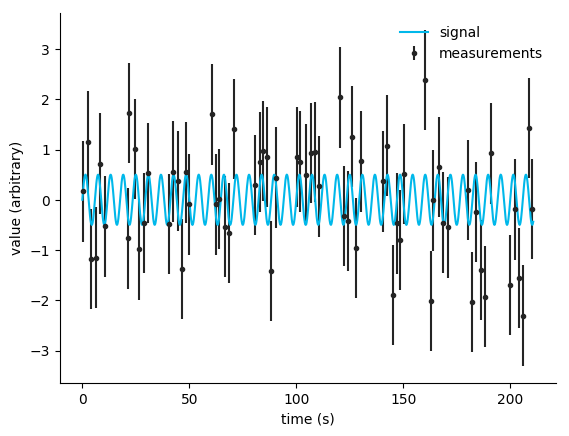

In [508]:
# seed the random number generator
srand(1)

startt = vcat([ t .+ float.(0:2:10) for t in float.(0:20:200) ]...)
startt .+= randn(length(startt)) * 0.3
endt = startt + 1
endt .+= randn(length(startt)) * 0.1

as = AxionSim(
    ct = CycleTimes(startt, endt),
    runlengths = length(startt) * ones(Int, 1),
    sR = 1)


realA = 0.5
realf = 0.17
R = mcR(as, realA, realf, 0, 0)

plott = linspace(0, maximum(as.ct.t), 1000)
plot(plott, realA .* sin.(2π * realf .* plott), color = "C2", label = "signal")
errorbar(as.mt, R, yerr = as.sR, fmt = ".", color = "C0", label = "measurements")
xlabel("time (s)")
ylabel("value (arbitrary)")
legend()

savefig("../gfx/axions/basic_signal.pdf")

In [509]:
cleverfrequencies(as)

0.004746593026809439:0.004746593026809439:0.30852854674261354

In [510]:
# freqs = cleverfrequencies(as)

freqs = (0 : 0.005 : 1)[2:end]

irealf = searchsortedfirst(freqs, realf)

34

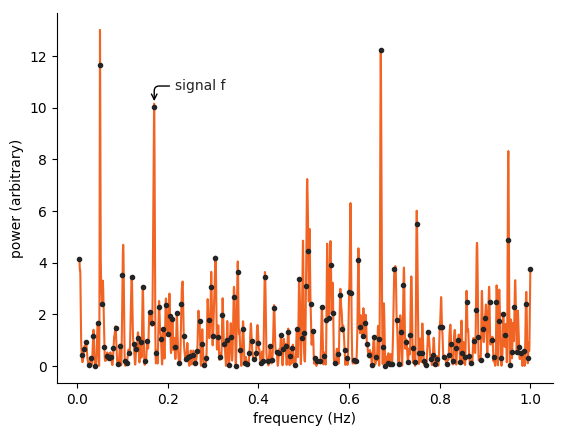

In [511]:
densefreqs = logspace(log10.(extrema(freqs))..., 10000)

p = periodogramLSSA(freqs, as, R)

plot(densefreqs, periodogramLSSA(densefreqs, as, R), color = "C6", label = "dense periodogram")
plot(freqs, p, ".", label = "original periodogram")

annotate("signal f", color = "C0",
         xy=(realf, 1.01 * p[searchsortedfirst(freqs, realf)]), xycoords="data",
         xytext=(15, 10), textcoords="offset points",
         horizontalalignment = "left",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5"))

# axvline(realf)
# axvline(2realf)
# axvline(3realf)
# axvline(4realf)

xlabel("frequency (Hz)")
ylabel("power (arbitrary)")

# legend()

# ylim(ymax = 0.155)

savefig("../gfx/axions/basic_periodogram.pdf")

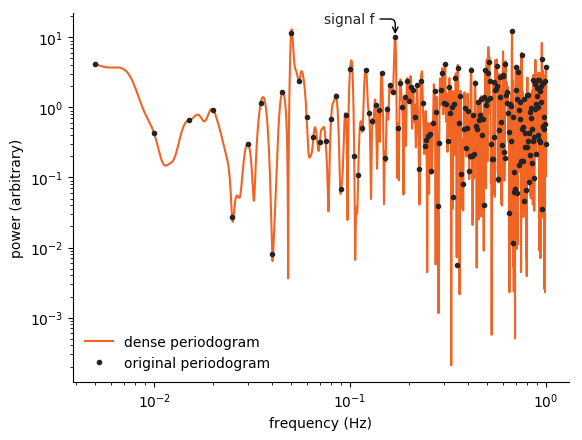

In [414]:
densefreqs = logspace(log10.(extrema(freqs))..., 10000)

p = periodogramLSSA(freqs, as, R)

plot(densefreqs, periodogramLSSA(densefreqs, as, R), color = "C6", label = "dense periodogram")
plot(freqs, p, ".", label = "original periodogram")

annotate("signal f", color = "C0",
         xy=(realf, 1.01 * p[irealf]), xycoords="data",
         xytext=(-15, 10), textcoords="offset points",
         horizontalalignment = "right",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5"))

# axvline(realf)
# axvline(2realf)
# axvline(3realf)
# axvline(4realf)

xlabel("frequency (Hz)")
ylabel("power (arbitrary)")

xscale("log")
yscale("log")

legend()

savefig("../gfx/axions/basic_periodogram_loglog.pdf")

# ylim(ymax = 0.155)

In [416]:
nullperiodograms = mcperiodograms(as, freqs, 0, realf, mcmultiplicity = 10000, fitoffsets = false, simjumpsize = 0)

Progress: 100%|█████████████████████████████████████████| Time: 0:03:04


200×10000 Array{Float64,2}:
 2.4115      3.01895    1.11785     …  1.29375     1.34774   0.793722 
 0.80468     4.89469    1.5292         1.65645     0.186433  4.68103  
 0.290149    0.177592   0.551365       1.82463     1.044     2.92786  
 1.18069     0.216803   0.0948471      0.458254    0.169663  1.6399   
 0.0511064   0.152372   1.68176        1.44783     1.86183   2.32157  
 0.814145    1.21172    0.0243727   …  3.85312     1.99204   1.28681  
 1.61912     0.07674    0.256169       1.5897      0.646703  1.30974  
 0.234188    5.46298    1.37845        0.205711    0.193319  0.228263 
 0.982101    6.68723    0.446101       4.70787     2.2546    0.209181 
 3.17817     2.29413    0.180703       2.85376     4.51523   0.0517076
 0.638849    5.54596    0.547947    …  0.117946    0.262535  0.282264 
 0.203206    0.454239   2.85902        1.47912     0.175266  3.0549   
 0.184545    0.491794   0.308755       0.445113    0.96601   0.215761 
 ⋮                                  ⋱            

In [417]:
@save "nullperiodograms.jld" nullperiodograms

In [418]:
confidencelevels = erf.((1:3) ./ √2)
pups = map(cl -> mapslices(d -> quantile(d, cl), nullperiodograms, 2) |> vec, confidencelevels)
pdowns = map(cl -> mapslices(d -> quantile(d, 1 - cl), nullperiodograms, 2) |> vec, confidencelevels)

3-element Array{Array{Float64,1},1}:
 [0.371566, 0.378491, 0.387888, 0.374302, 0.441545, 0.379901, 0.37679, 0.380962, 0.37306, 0.648196  …  0.388845, 0.384635, 0.372119, 0.390365, 0.412358, 0.385914, 0.386011, 0.399884, 0.385721, 0.384111]                                          
 [0.0457636, 0.0444288, 0.0477339, 0.0479821, 0.0524095, 0.0441903, 0.04381, 0.0459544, 0.043052, 0.0782456  …  0.0466352, 0.0453745, 0.0478296, 0.0475118, 0.0521826, 0.050702, 0.0475128, 0.0519741, 0.0474691, 0.0480171]                        
 [0.00317953, 0.00261294, 0.00309916, 0.00351455, 0.00229747, 0.00235875, 0.00292013, 0.00230123, 0.00192994, 0.00348599  …  0.00281974, 0.00336037, 0.00189421, 0.00297534, 0.00306089, 0.00336965, 0.00326966, 0.00353431, 0.00222179, 0.00305853]

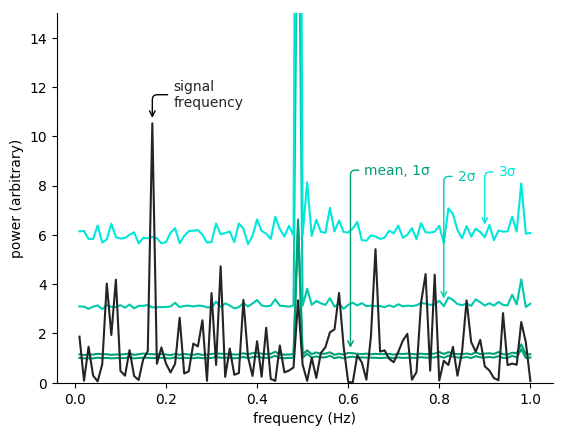

In [290]:
plot(freqs, mean(nullperiodograms, 2), color = "C3")
plot(freqs, pups[1], color = "C3")
plot(freqs, pups[2], color = brighten("C3", 0.5))
plot(freqs, pups[3], color = brighten("C3", 0.8))

plot(freqs, p)

annotate("signal\nfrequency", color = "C0",
         xy=(realf, 1.01 * p[irealf]), xycoords="data",
         xytext=(15, 10), textcoords="offset points",
         horizontalalignment = "left",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=180,angleB=90,rad=5"))




annotate("3σ", color = brighten("C3", 0.8),
         xy=(0.9, 6.3), xycoords="data",
         xytext=(10, 40), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5",
                           "color" => brighten("C3", 0.8)))

annotate("2σ", color = brighten("C3", 0.5),
         xy=(0.81, 3.3), xycoords="data",
         xytext=(10, 90), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5",
                           "color" => brighten("C3", 0.5)))

annotate("mean, 1σ", color = brighten("C3", 0),
         xy=(0.605, 1.3), xycoords="data",
         xytext=(10, 130), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5",
                           "color" => brighten("C3", 0)))


# yscale("log")
# xscale("log")
xlabel("frequency (Hz)")
ylabel("power (arbitrary)")

ylim(0, 15)

savefig("../gfx/axions/basic_detection.pdf")

In [401]:
function findleastprobable(nullperiodograms)
    [ nullperiodograms[ findmax(sum(nullperiodograms[:,i] .> nullperiodograms, 2))[2], i]
    for i in 1:size(nullperiodograms, 2) ]
end

findleastprobable (generic function with 1 method)

In [419]:
leastprobablepowers = findleastprobable(nullperiodograms)

10000-element Array{Float64,1}:
 4.52309
 7.13833
 5.03513
 6.59557
 3.92001
 3.12433
 5.09235
 8.30862
 3.5538 
 4.24732
 5.53113
 6.10525
 6.32463
 ⋮      
 9.48975
 5.17488
 6.8829 
 7.54237
 3.99535
 4.96425
 5.64864
 8.14287
 6.30663
 6.70453
 8.68909
 4.68103

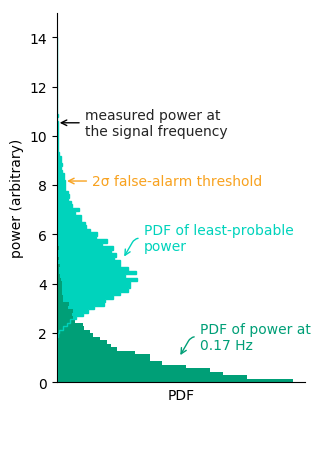

In [291]:
figure(figsize=(6.4 / 2, 4.8))

mybins = linspace(0, 14, 100)

plt[:hist](leastprobablepowers, orientation = "horizontal", color = brighten("C3", 0.6), bins = mybins, normed = true)

plt[:hist](nullperiodograms[irealf, :], orientation = "horizontal", color = "C3", bins = mybins, normed = true)

# just to get the line on top
plt[:hist](leastprobablepowers, orientation = "horizontal", color = brighten("C3", 0.6), bins = mybins, normed = true,
histtype = "step")


annotate("measured power at\nthe signal frequency", color = "C0",
         xy=(0, p[irealf]), xycoords="data",
         xytext=(20, 0), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "arc,angleB=0,armB=20,rad=5"))

annotate("PDF of power at\n$realf Hz", color = "C3",
         xy=(0.5, 1), xycoords="data",
         xytext=(15, 15), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => "C3"))


annotate("PDF of least-probable\npower", color = brighten("C3", 0.6),
         xy=(0.27, 5), xycoords="data",
         xytext=(15, 15), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => brighten("C3", 0.6)))

annotate("2σ false-alarm threshold", color = "C1",
         xy=(0.03, quantile(leastprobablepowers, confidencelevels[2])), xycoords="data",
         xytext=(20, 0), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "arc,angleB=0,armB=20,rad=5",
                           "color" => "C1"))

annotate("3σ false-alarm threshold", color = "C1",
         xy=(0.03, quantile(leastprobablepowers, confidencelevels[3])), xycoords="data",
         xytext=(20, 0), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "arc,angleB=0,armB=20,rad=5",
                           "color" => "C1"))



ylabel("power (arbitrary)")
xlabel("PDF")

xticks([])

ylim(0, 15)

savefig("../gfx/axions/basic_detection_histogram.pdf")

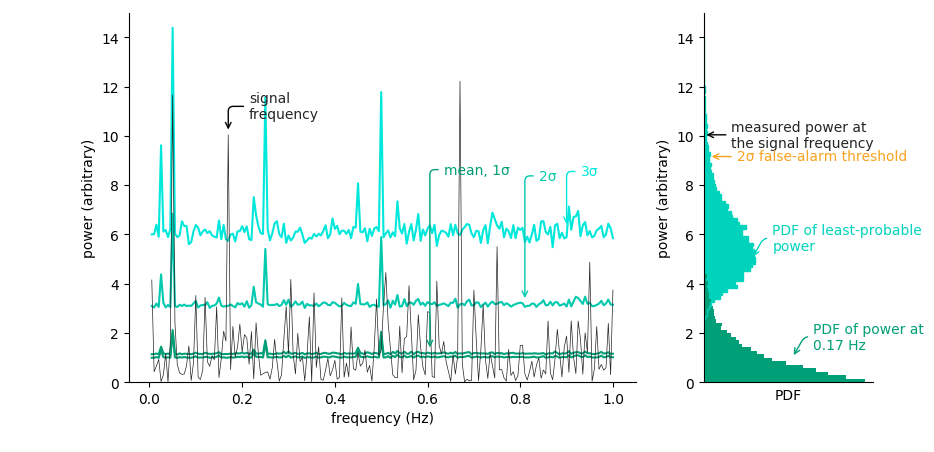

In [424]:
fig, axs = subplots(1, 2, gridspec_kw = Dict("width_ratios" => [3, 1]), figsize=(6.4 * 1.5, 4.8))



sca(axs[1])
plot(freqs, mean(nullperiodograms, 2), color = "C3")
plot(freqs, pups[1], color = "C3")
plot(freqs, pups[2], color = brighten("C3", 0.5))
plot(freqs, pups[3], color = brighten("C3", 0.8))

plot(freqs, p, lw = 0.5)

annotate("signal\nfrequency", color = "C0",
         xy=(realf, 1.01 * p[irealf]), xycoords="data",
         xytext=(15, 10), textcoords="offset points",
         horizontalalignment = "left",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=180,angleB=90,rad=5"))




annotate("3σ", color = brighten("C3", 0.8),
         xy=(0.9, 6.3), xycoords="data",
         xytext=(10, 40), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5",
                           "color" => brighten("C3", 0.8)))

annotate("2σ", color = brighten("C3", 0.5),
         xy=(0.81, 3.3), xycoords="data",
         xytext=(10, 90), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5",
                           "color" => brighten("C3", 0.5)))

annotate("mean, 1σ", color = brighten("C3", 0),
         xy=(0.605, 1.3), xycoords="data",
         xytext=(10, 130), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5",
                           "color" => brighten("C3", 0)))


# yscale("log")
# xscale("log")
xlabel("frequency (Hz)")
ylabel("power (arbitrary)")

ylim(0, 15)
# yscale("log")




sca(axs[2])

mybins = linspace(0, 14, 100)

plt[:hist](leastprobablepowers, orientation = "horizontal", color = brighten("C3", 0.6), bins = mybins, normed = true)

plt[:hist](nullperiodograms[irealf, :], orientation = "horizontal", color = "C3", bins = mybins, normed = true)

# just to get the line on top
plt[:hist](leastprobablepowers, orientation = "horizontal", color = brighten("C3", 0.6), bins = mybins, normed = true,
histtype = "step")


annotate("measured power at\nthe signal frequency", color = "C0",
         xy=(0, p[irealf]), xycoords="data",
         xytext=(20, 0), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "arc,angleB=0,armB=20,rad=5"))

annotate("PDF of power at\n$realf Hz", color = "C3",
         xy=(0.5, 1), xycoords="data",
         xytext=(15, 15), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => "C3"))


annotate("PDF of least-probable\npower", color = brighten("C3", 0.6),
         xy=(0.27, 5), xycoords="data",
         xytext=(15, 15), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => brighten("C3", 0.6)))

annotate("2σ false-alarm threshold", color = "C1",
         xy=(0.03, quantile(leastprobablepowers, confidencelevels[2])), xycoords="data",
         xytext=(20, 0), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "arc,angleB=0,armB=20,rad=5",
                           "color" => "C1"))

annotate("3σ false-alarm threshold", color = "C1",
         xy=(0.03, quantile(leastprobablepowers, confidencelevels[3])), xycoords="data",
         xytext=(20, 0), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "arc,angleB=0,armB=20,rad=5",
                           "color" => "C1"))



ylabel("power (arbitrary)")
xlabel("PDF")

xticks([])

ylim(0, 15)
# yscale("log")

savefig("../gfx/axions/basic_detection.pdf")

In [431]:
exclampls = logspace(-1, 1, 25)
exclfreqs = logspace(-3, 1, 25)

signalperiodograms = mcsignalpowers(as, exclfreqs, exclampls,
    mcmultiplicity = 100, fitoffsets = false, simjumpsize = 0)

exclnullperiodograms = mcperiodograms(as, exclfreqs, 0, realf, mcmultiplicity = 10000,
    fitoffsets = false, simjumpsize = 0)

frequency 0.001, amplitude 0.1
frequency 0.0014677992676220691, amplitude 0.1
frequency 0.0021544346900318843, amplitude 0.1
frequency 0.0031622776601683794, amplitude 0.1
frequency 0.004641588833612777, amplitude 0.1
frequency 0.006812920690579615, amplitude 0.1
frequency 0.01, amplitude 0.1
frequency 0.014677992676220698, amplitude 0.1
frequency 0.021544346900318832, amplitude 0.1
frequency 0.03162277660168379, amplitude 0.1
frequency 0.046415888336127795, amplitude 0.1
frequency 0.06812920690579612, amplitude 0.1
frequency 0.1, amplitude 0.1
frequency 0.14677992676220694, amplitude 0.1
frequency 0.2154434690031884, amplitude 0.1
frequency 0.31622776601683794, amplitude 0.1
frequency 0.4641588833612779, amplitude 0.1
frequency 0.6812920690579612, amplitude 0.1
frequency 1.0, amplitude 0.1
frequency 1.4677992676220695, amplitude 0.1
frequency 2.154434690031884, amplitude 0.1
frequency 3.1622776601683795, amplitude 0.1
frequency 4.641588833612778, amplitude 0.1
frequency 6.812920690579

frequency 0.001, amplitude 0.31622776601683794
frequency 0.0014677992676220691, amplitude 0.31622776601683794
frequency 0.0021544346900318843, amplitude 0.31622776601683794
frequency 0.0031622776601683794, amplitude 0.31622776601683794
frequency 0.004641588833612777, amplitude 0.31622776601683794
frequency 0.006812920690579615, amplitude 0.31622776601683794
frequency 0.01, amplitude 0.31622776601683794
frequency 0.014677992676220698, amplitude 0.31622776601683794
frequency 0.021544346900318832, amplitude 0.31622776601683794
frequency 0.03162277660168379, amplitude 0.31622776601683794
frequency 0.046415888336127795, amplitude 0.31622776601683794
frequency 0.06812920690579612, amplitude 0.31622776601683794
frequency 0.1, amplitude 0.31622776601683794
frequency 0.14677992676220694, amplitude 0.31622776601683794
frequency 0.2154434690031884, amplitude 0.31622776601683794
frequency 0.31622776601683794, amplitude 0.31622776601683794
frequency 0.4641588833612779, amplitude 0.31622776601683794

frequency 3.1622776601683795, amplitude 0.8254041852680184
frequency 4.641588833612778, amplitude 0.8254041852680184
frequency 6.812920690579613, amplitude 0.8254041852680184
frequency 10.0, amplitude 0.8254041852680184
frequency 0.001, amplitude 1.0
frequency 0.0014677992676220691, amplitude 1.0
frequency 0.0021544346900318843, amplitude 1.0
frequency 0.0031622776601683794, amplitude 1.0
frequency 0.004641588833612777, amplitude 1.0
frequency 0.006812920690579615, amplitude 1.0
frequency 0.01, amplitude 1.0
frequency 0.014677992676220698, amplitude 1.0
frequency 0.021544346900318832, amplitude 1.0
frequency 0.03162277660168379, amplitude 1.0
frequency 0.046415888336127795, amplitude 1.0
frequency 0.06812920690579612, amplitude 1.0
frequency 0.1, amplitude 1.0
frequency 0.14677992676220694, amplitude 1.0
frequency 0.2154434690031884, amplitude 1.0
frequency 0.31622776601683794, amplitude 1.0
frequency 0.4641588833612779, amplitude 1.0
frequency 0.6812920690579612, amplitude 1.0
frequen

frequency 10.0, amplitude 2.610157215682537
frequency 0.001, amplitude 3.1622776601683795
frequency 0.0014677992676220691, amplitude 3.1622776601683795
frequency 0.0021544346900318843, amplitude 3.1622776601683795
frequency 0.0031622776601683794, amplitude 3.1622776601683795
frequency 0.004641588833612777, amplitude 3.1622776601683795
frequency 0.006812920690579615, amplitude 3.1622776601683795
frequency 0.01, amplitude 3.1622776601683795
frequency 0.014677992676220698, amplitude 3.1622776601683795
frequency 0.021544346900318832, amplitude 3.1622776601683795
frequency 0.03162277660168379, amplitude 3.1622776601683795
frequency 0.046415888336127795, amplitude 3.1622776601683795
frequency 0.06812920690579612, amplitude 3.1622776601683795
frequency 0.1, amplitude 3.1622776601683795
frequency 0.14677992676220694, amplitude 3.1622776601683795
frequency 0.2154434690031884, amplitude 3.1622776601683795
frequency 0.31622776601683794, amplitude 3.1622776601683795
frequency 0.4641588833612779, a

frequency 6.812920690579613, amplitude 8.254041852680183
frequency 10.0, amplitude 8.254041852680183
frequency 0.001, amplitude 10.0
frequency 0.0014677992676220691, amplitude 10.0
frequency 0.0021544346900318843, amplitude 10.0
frequency 0.0031622776601683794, amplitude 10.0
frequency 0.004641588833612777, amplitude 10.0
frequency 0.006812920690579615, amplitude 10.0
frequency 0.01, amplitude 10.0
frequency 0.014677992676220698, amplitude 10.0
frequency 0.021544346900318832, amplitude 10.0
frequency 0.03162277660168379, amplitude 10.0
frequency 0.046415888336127795, amplitude 10.0
frequency 0.06812920690579612, amplitude 10.0
frequency 0.1, amplitude 10.0
frequency 0.14677992676220694, amplitude 10.0
frequency 0.2154434690031884, amplitude 10.0
frequency 0.31622776601683794, amplitude 10.0
frequency 0.4641588833612779, amplitude 10.0
frequency 0.6812920690579612, amplitude 10.0
frequency 1.0, amplitude 10.0
frequency 1.4677992676220695, amplitude 10.0
frequency 2.154434690031884, ampl

Progress: 100%|█████████████████████████████████████████| Time: 0:00:27


25×10000 Array{Float64,2}:
 30.6206     160.123      10.4753     90.4133      …  9.1224      11.4322    
  7.40363     38.1564      3.20735    21.2422         2.65294      4.11725   
  1.97929     10.3001      1.24899     5.50772        1.00221      2.0329    
  0.582965     3.76351     0.656498    1.75456        0.566683     1.60987   
  0.352369     2.81785     0.297921    0.949198       0.384706     2.17704   
  1.76584      2.60262     0.493979    1.62281     …  0.239576     0.260426  
  1.85328      0.41307     0.32434     0.751202       0.35435      1.51549   
  0.0725766    0.242229    1.05092     2.60789        0.831156     0.563388  
  0.735714     0.562759    0.212204    0.846574       0.773428     0.789354  
  2.22357      0.186559    0.16763     1.12699        0.771039     2.04496   
  1.36945      0.268205    0.0504236   0.182738    …  0.58695      1.9089    
  0.655424     0.219251    0.0463553   1.39185        0.149377     1.32915   
  0.527446     1.77156     0.903764  

In [432]:
CLmap = exclusionreport(as, R, exclfreqs, exclampls, exclnullperiodograms, signalperiodograms, fitoffsets = false)
CLmap_noCLs = exclusionreport(as, R, exclfreqs, exclampls, exclnullperiodograms, signalperiodograms, fitoffsets = false,
    useCLsmethod = false)

25×25 Array{Float64,2}:
 0.02  0.01  0.03  0.02  0.01  0.01  …  0.3   0.6   0.86  0.95  0.98  1.0 
 0.02  0.01  0.02  0.01  0.01  0.01     1.0   1.0   1.0   1.0   1.0   1.0 
 0.01  0.0   0.01  0.02  0.0   0.01     1.0   1.0   1.0   1.0   1.0   1.0 
 0.02  0.04  0.03  0.0   0.05  0.04     1.0   1.0   1.0   1.0   1.0   1.0 
 0.02  0.02  0.07  0.04  0.08  0.12     1.0   1.0   1.0   1.0   1.0   1.0 
 0.06  0.07  0.09  0.12  0.06  0.17  …  1.0   1.0   1.0   1.0   1.0   1.0 
 0.67  0.76  0.72  0.73  0.83  0.87     1.0   1.0   1.0   1.0   1.0   1.0 
 0.49  0.65  0.63  0.64  0.77  0.79     1.0   1.0   1.0   1.0   1.0   1.0 
 0.67  0.7   0.76  0.79  0.76  0.84     1.0   1.0   1.0   1.0   1.0   1.0 
 0.95  0.88  0.88  0.97  0.99  0.94     1.0   1.0   1.0   1.0   1.0   1.0 
 0.26  0.35  0.45  0.54  0.43  0.57  …  1.0   1.0   1.0   1.0   1.0   1.0 
 0.81  0.83  0.85  0.86  0.8   0.93     1.0   1.0   1.0   1.0   1.0   1.0 
 0.04  0.03  0.03  0.1   0.18  0.22     1.0   1.0   1.0   1.0   1.0   1.0 
 

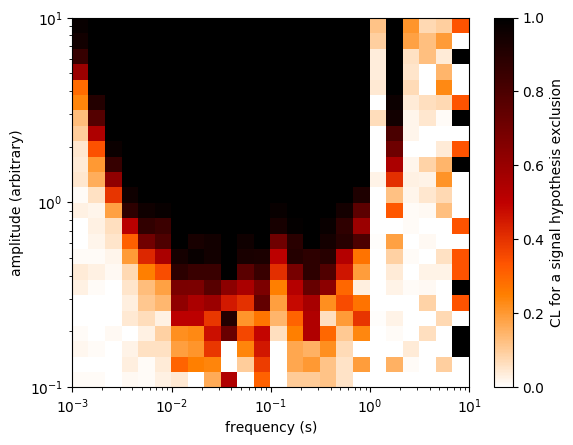

In [433]:
# boundsgrid(a) = logspace(extrema(log10(a))..., length(a) + 1)
pcolormesh(exclfreqs, exclampls, CLmap',
           vmax=1, vmin=0, cmap="gist_heat_r")
colorbar(label="CL for a signal hypothesis exclusion")
xscale("log")
xlabel("frequency (s)")
yscale("log")
ylabel("amplitude (arbitrary)")

gca()[:spines]["top"][:set_visible](true)
gca()[:spines]["right"][:set_visible](true)

savefig("../gfx/axions/basic_exclusion.pdf")

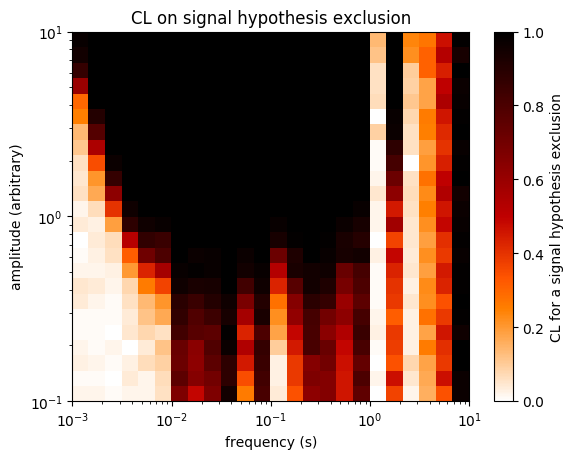

In [434]:
# boundsgrid(a) = logspace(extrema(log10(a))..., length(a) + 1)
pcolormesh(exclfreqs, exclampls, CLmap_noCLs',
           vmax=1, vmin=0, cmap="gist_heat_r")
colorbar(label="CL for a signal hypothesis exclusion")
xscale("log")
xlabel("frequency (s)")
yscale("log")
ylabel("amplitude (arbitrary)")
title("CL on signal hypothesis exclusion")

gca()[:spines]["top"][:set_visible](true)
gca()[:spines]["right"][:set_visible](true)

savefig("../gfx/axions/basic_exclusion_noCls.pdf")